<a href="https://colab.research.google.com/github/DarioLankenau/AI_Models/blob/main/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

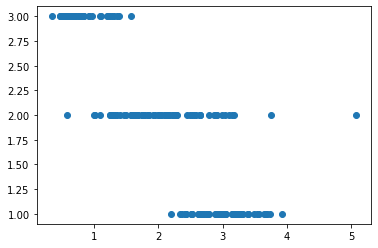

In [ ]:
from numpy import ma
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns


columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intesity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv('wine.data',names = columns)

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data

x_T = df[["Flavanoids"]]
x_T = x_T.to_numpy()
y_T = df[["Class"]]
y_T = y_T.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_T, y_T, test_size=0.15)

onehot = encoder.fit_transform(y_test.reshape(-1,1))
y_train = onehot
y_test = onehot

alpha = 0.008

h   = lambda x,theta: 1/(1+np.exp(-(theta[0] + theta[1] * x)))
j_i = lambda x,y,theta: y*np.log(h(x,theta)) + (1-y)*np.log(1-h(x,theta))

plt.scatter(x_T,y_T)
plt.show()
n = len(y_train)

In [ ]:
theta = [1,1] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)

for idx in range(23000):
  acumDelta = []
  acumDeltax = []
  for x_i,y_i in zip(x_train,y_train):
    acumDelta.append(h(x_i,theta)-y_i)
    acumDeltax.append((h(x_i,theta)-y_i)*x_i)
    
  st0 = sum(acumDelta)
  st1 = sum(acumDeltax)

  theta[0] = theta[0]-alpha/n*st0
  theta[1] = theta[1]-alpha/n*st1
print(theta)

[array([-1.78588618, -0.13497275, -0.20344573]), array([ 0.5955104 , -0.28357959, -0.34042229])]


In [ ]:
n_train = len(y_train)
n_validate = len(y_test)


# Validación
acumDelta = []
for x_i, y_i in zip(x_test,y_test):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_validate = 1/(2*n_validate)*sDelta


# Training
acumDelta = []
for x_i, y_i in zip(x_train,y_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta

print(J_validate)
print(J_train)
print(theta)


labels = {
    "Class 1" : [0.1,0.0,0.0],
    "Class 2" : [0.0,0.1,0.0],
    "Class 3" : [0.0,0.0,0.1]
}


results = h(x_test,theta)

res = []
val = []
booleans = []
booleans = np.array(booleans)
for index in results:
  res.append(np.argmax(index))
np.reshape(results,-1)

for index in y_test:
  val.append(np.argmax(index))

res = np.array(res)
val = np.array(val)

y_total = len(y_test)
booleans = res==val
true_y = booleans.sum()
print(res)
print(booleans.sum())
print(booleans)
print("\nClassification Report\n")
print(classification_report(val, res))



n = len(y_train)

[-0.24063352 -0.32023635 -0.25034806]
[-0.30773999 -0.31325278 -0.29714951]
[array([-1.78588618, -0.13497275, -0.20344573]), array([ 0.5955104 , -0.28357959, -0.34042229])]
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0]
17
[ True False  True  True  True  True  True False  True False  True False
  True  True  True False  True False False  True  True  True  True False
  True False False]

Classification Report

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.47      0.78      0.58         9
           2       0.00      0.00      0.00         8

    accuracy                           0.63        27
   macro avg       0.43      0.59      0.50        27
weighted avg       0.46      0.63      0.53        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
print("Predicciones: ", res)
print("Valores reales: ", val)


Predicciones:  [0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0]
Valores reales:  [0 2 1 0 1 1 1 2 0 2 0 2 1 1 0 2 0 1 2 0 0 0 0 2 1 2 1]
